<a href="https://colab.research.google.com/github/JulioCarrizales/19200200_PARCIAL_DAM/blob/master/PC_2_JULIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **CARRIZALES VALENCIA JULIO - 19200200**








In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn pyreadstat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [ ]:
from google.colab import files
uploaded = files.upload()

data = pd.read_spss('BASE CHURN TC_2.sav')

print(data.head())
print(data.info())


Saving BASE CHURN TC_2.sav to BASE CHURN TC_2 (2).sav
    CodCli  Edad  Gener  EstCiv  Sexo  Ingreso  TipSuel  NZona  AntiAño  \
0  11332.0  57.0    4.0     1.0   2.0  4641.28      1.0    8.0     24.0   
1  18835.0  65.0    4.0     1.0   2.0   904.70      3.0    1.0     18.0   
2  22046.0  51.0    4.0     1.0   2.0  1988.43      1.0    5.0     15.0   
3  24015.0  65.0    4.0     4.0   1.0  2169.34      1.0    8.0     21.0   
4  24475.0  56.0    4.0     1.0   1.0   798.00      2.0    6.0     21.0   

   AntiMes  ...  SalTC_RCC_GNB  SalTC_RCC_Cenco  SalTC_RCC_Azt  \
0    291.0  ...            NaN              NaN            NaN   
1    225.0  ...            NaN              NaN            NaN   
2    191.0  ...            NaN              NaN            NaN   
3    262.0  ...            NaN              NaN            NaN   
4    259.0  ...            NaN              NaN            NaN   

   SalTC_RCC_Fala  SalTC_RCC_Uno  SalTC_RCC_Citi  TotSal_RCC_TC  \
0             NaN            Na

In [ ]:
# Mostrar la cantidad de valores faltantes por columna
print("Valores faltantes por columna:")
print(data_encoded.isnull().sum())

# Eliminar columnas con todos los valores nulos
data_cleaned = data_encoded.dropna(axis=1, how='all')

# Separar las características (X) y la variable objetivo (y)
features = data_cleaned.drop(columns=[target_column])
target = data_cleaned[target_column]

# Imputar valores faltantes con la media
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')
features_imputed = mean_imputer.fit_transform(features)

# Convertir el resultado imputado a DataFrame
features_df = pd.DataFrame(features_imputed, columns=features.columns)


Cantidad de valores faltantes por columna:
CodCli                 0
Edad                   0
Gener                  0
EstCiv                 0
Sexo                   0
Ingreso                0
TipSuel                0
NZona                  0
AntiAño                0
AntiMes                0
Ahorro              2743
Plazo               3182
Cts                 3196
Chip                3225
Vehicular           3236
Pld                 3218
LineaTC                0
SaldoTC                0
CredTienda          3217
Convenios           3228
CantProd               0
LinTC_RCC_BCP       2250
LinTC_RCC_IBK       1893
LinTC_RCC_Scotia    2945
LinTC_RCC_Conti     2760
LinTC_RCC_BIF       3188
LinTC_RCC_Credi     2402
LinTC_RCC_Ripley    2191
LinTC_RCC_Finan      354
LinTC_RCC_GNB       3213
LinTC_RCC_Cenco     2679
LinTC_RCC_Azt       3164
LinTC_RCC_Fala      2126
LinTC_RCC_Uno       2429
LinTC_RCC_Citi      3181
MaxLinTC_RCC           0
Entidad_LinTC          0
SalTC_RCC_BCP       2611
SalTC_R

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Métricas de Regresión Logística:
Accuracy: 0.7253086419753086
ROC-AUC: 0.7514690529455631


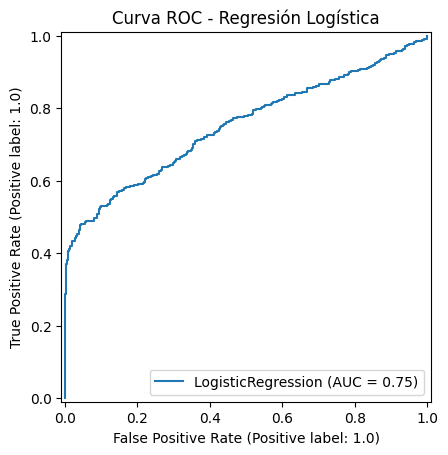

In [ ]:
# Modelo de Regresión Logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Predicciones y cálculo de métricas
predicted_labels = logistic_model.predict(X_test)
predicted_probabilities = logistic_model.predict_proba(X_test)[:, 1]

print("Resultados del Modelo de Regresión Logística:")
print("Precisión (Accuracy):", accuracy_score(y_test, predicted_labels))
print("ROC-AUC:", roc_auc_score(y_test, predicted_probabilities))

# Visualización: Curva ROC
RocCurveDisplay.from_estimator(logistic_model, X_test, y_test)
plt.title("Curva ROC - Modelo de Regresión Logística")
plt.show()


Métricas de Árbol de Decisión:
Accuracy: 0.7942386831275721
ROC-AUC: 0.7939022051773729


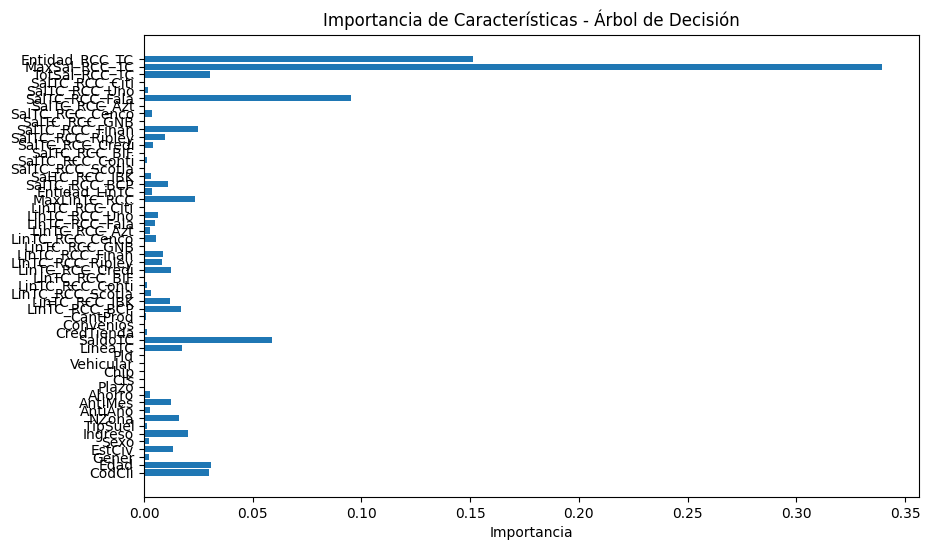

In [ ]:
# Modelo de Árbol de Decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predicciones y métricas
predictions_tree = decision_tree_model.predict(X_test)
print("Resultados del Árbol de Decisión:")
print("Precisión (Accuracy):", accuracy_score(y_test, predictions_tree))
print("ROC-AUC:", roc_auc_score(y_test, predictions_tree))

# Gráfico: Importancia de las características
feature_importance = decision_tree_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(y=X.columns, width=feature_importance, color='skyblue')
plt.xlabel("Nivel de Importancia")
plt.title("Importancia de las Características - Modelo de Árbol de Decisión")
plt.show()

Métricas de Random Forest:
Accuracy: 0.8569958847736625
ROC-AUC: 0.8836539895600297


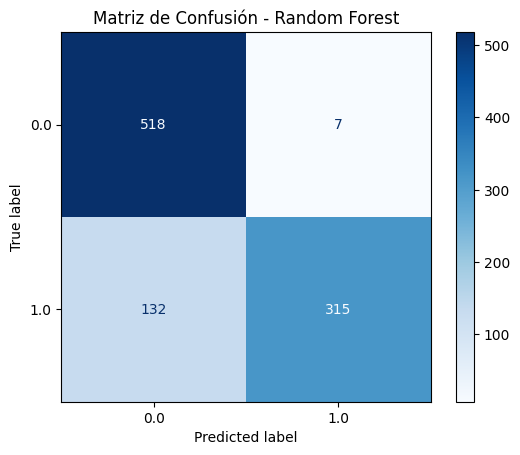

In [ ]:
# Modelo Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest_model.fit(X_train, y_train)

# Predicciones y métricas
rf_predictions = random_forest_model.predict(X_test)
rf_probabilities = random_forest_model.predict_proba(X_test)[:, 1]

print("Resultados del Modelo Random Forest:")
print("Precisión (Accuracy):", accuracy_score(y_test, rf_predictions))
print("ROC-AUC:", roc_auc_score(y_test, rf_probabilities))

# Visualización: Matriz de Confusión
ConfusionMatrixDisplay.from_estimator(random_forest_model, X_test, y_test, cmap='Blues')
plt.title("Matriz de Confusión - Modelo Random Forest")
plt.show()


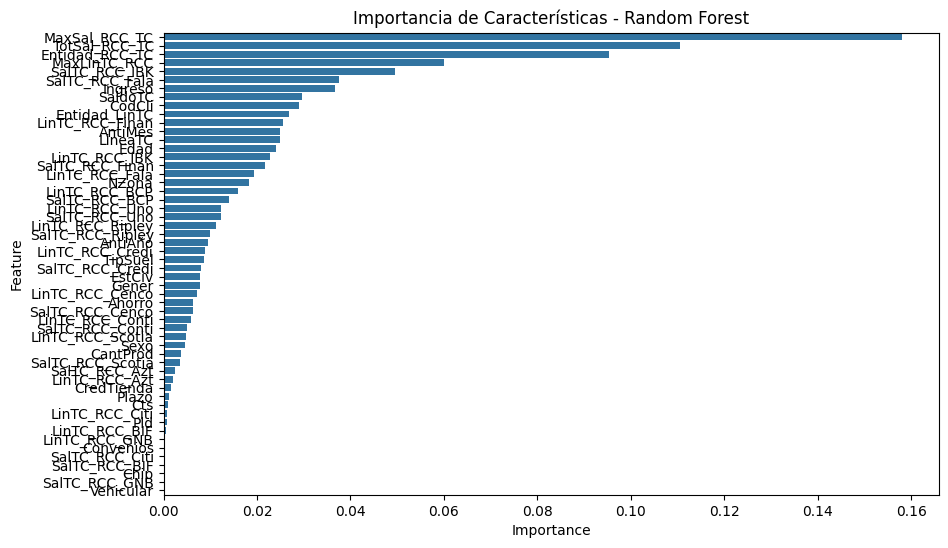

In [ ]:
# Gráfico: Importancia de Características
feature_importances_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_rf)
plt.title("Importancia de Características - Random Forest")
plt.show()


Total de clientes a retener (probabilidad > 60%): 310


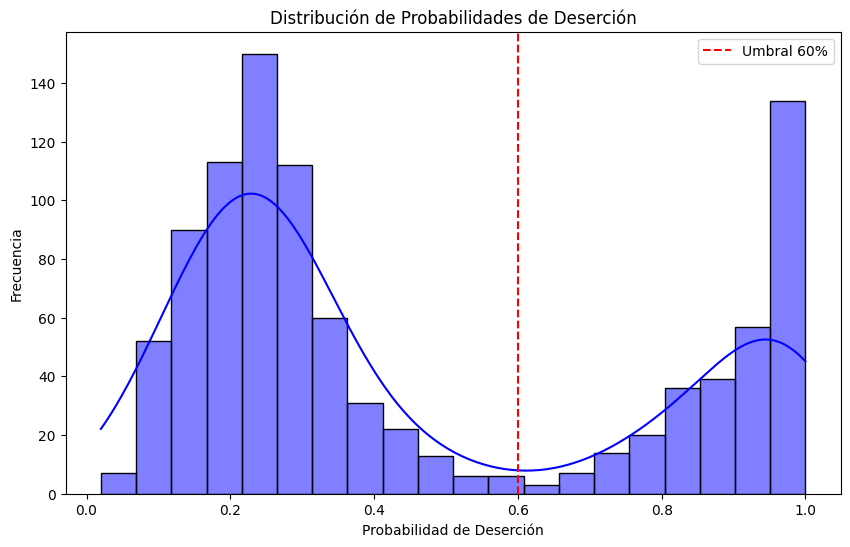

In [ ]:
# Identificar clientes con probabilidad de deserción > 60%
rf_probabilities = random_forest_model.predict_proba(X_test)[:, 1]
clients_at_risk = X_test[rf_probabilities > 0.6]

print(f"Total de clientes con alta probabilidad de deserción (>60%): {len(clients_at_risk)}")

# Visualización: Distribución de probabilidades de deserción
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(rf_probabilities, bins=20, kde=True, color='skyblue', alpha=0.7)
plt.axvline(x=0.6, color='red', linestyle='--', label='Umbral: 60%')
plt.title("Distribución de Probabilidades de Deserción", fontsize=14)
plt.xlabel("Probabilidad de Deserción", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
